## Prediction of Settlement Prices using Ridge and Lasso Regression

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import sys
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Get the directory of the current script
try:
    # This will work if the script is being run as a file
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Use the current working directory if __file__ is not defined
    current_dir = os.getcwd()

from build_a_pipeline import build_pipeline_P0_foward_price
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import TimeDistributed, Dense

In [2]:
from build_a_pipeline import make_basic_features_pipeline_for_settlement_price_prediction
X_train_selected, X_val_selected, X_test_selected, y_train, y_val, y_test =  make_basic_features_pipeline_for_settlement_price_prediction()

In [11]:

X_val_selected = X_val_selected.sort_index(ascending=True)
y_val = y_val.sort_index(ascending=True)


## Ridge with Alpha 3

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=3)  # You can adjust the alpha parameter for regularization

# Train the model on the training data
ridge_model.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_val_selected)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Optionally, calculate Adjusted R-squared (if needed)
n = len(y_val)  # Number of samples
p = X_val_selected.shape[1]  # Number of features (predictors)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {r2_adj}')

# If needed, you can print the coefficients to see the effect of regularization
print(f'Ridge coefficients: {ridge_model.coef_}')

Mean Squared Error: 53.29436500316417
Root Mean Squared Error: 7.300298966697471
Mean Absolute Error: 5.087824952215636
R-squared: 0.14861775831551205
Explained Variance Score: 0.160861413865918
Adjusted R-squared: 0.09606329895227206
Ridge coefficients: [-1.61088615 -3.05146563 -0.51685425  2.57761627  0.51035336]


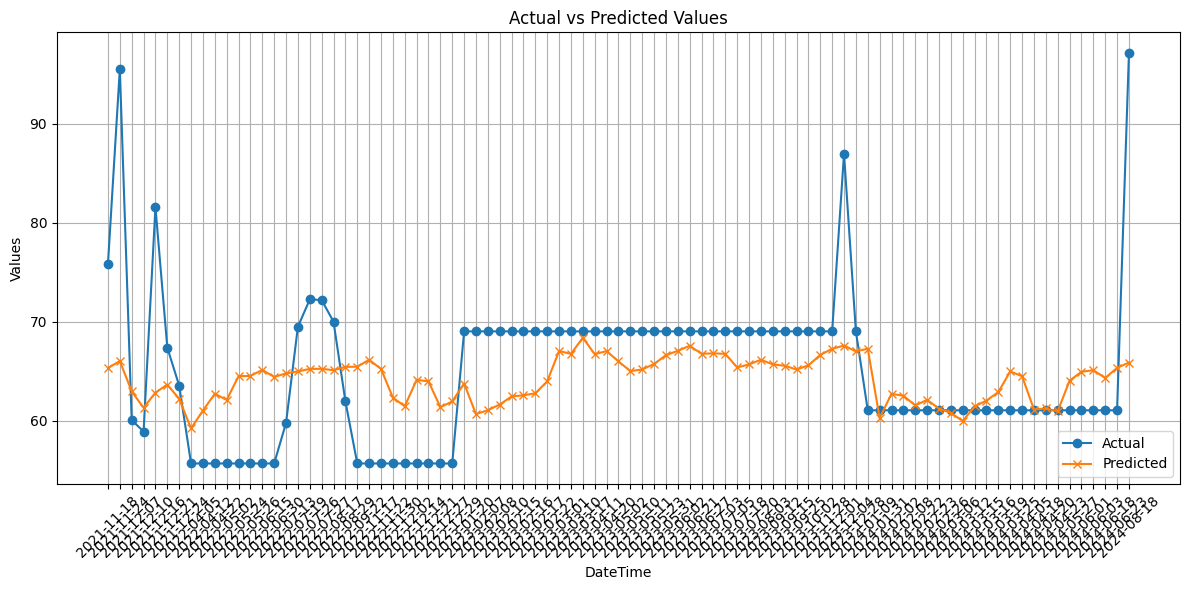

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Ridge Alpha 5

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Ridge regression model
ridge_model = Ridge(alpha=5)  # You can adjust the alpha parameter for regularization

# Train the model on the training data
ridge_model.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_val_selected)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Optionally, calculate Adjusted R-squared (if needed)
n = len(y_val)  # Number of samples
p = X_val_selected.shape[1]  # Number of features (predictors)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {r2_adj}')

# If needed, you can print the coefficients to see the effect of regularization
print(f'Ridge coefficients: {ridge_model.coef_}')

Mean Squared Error: 53.46220499479531
Root Mean Squared Error: 7.311785349338102
Mean Absolute Error: 5.110399914422382
R-squared: 0.14593649945614218
Explained Variance Score: 0.15813743829218263
Adjusted R-squared: 0.09321653028676824
Ridge coefficients: [-1.55601309 -2.98246839 -0.51073351  2.49056293  0.4864719 ]


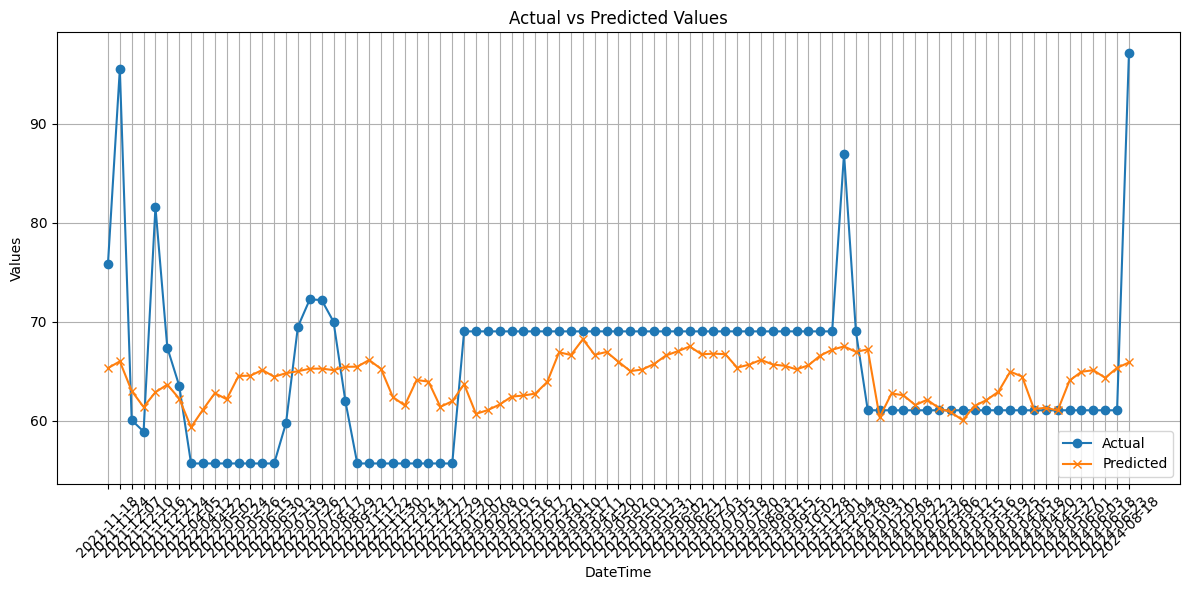

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Alpha 0.1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter for regularization

# Train the model on the training data
lasso_model.fit(X_train_selected, y_train)

# Make predictions on the validation data
y_pred = lasso_model.predict(X_val_selected)

# Evaluate the model performance

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Optionally, calculate Adjusted R-squared (if needed)
n = len(y_val)  # Number of samples
p = X_val_selected.shape[1]  # Number of features (predictors)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {r2_adj}')

# If needed, you can print the coefficients to see the effect of regularization
print(f'Lasso coefficients: {lasso_model.coef_}')


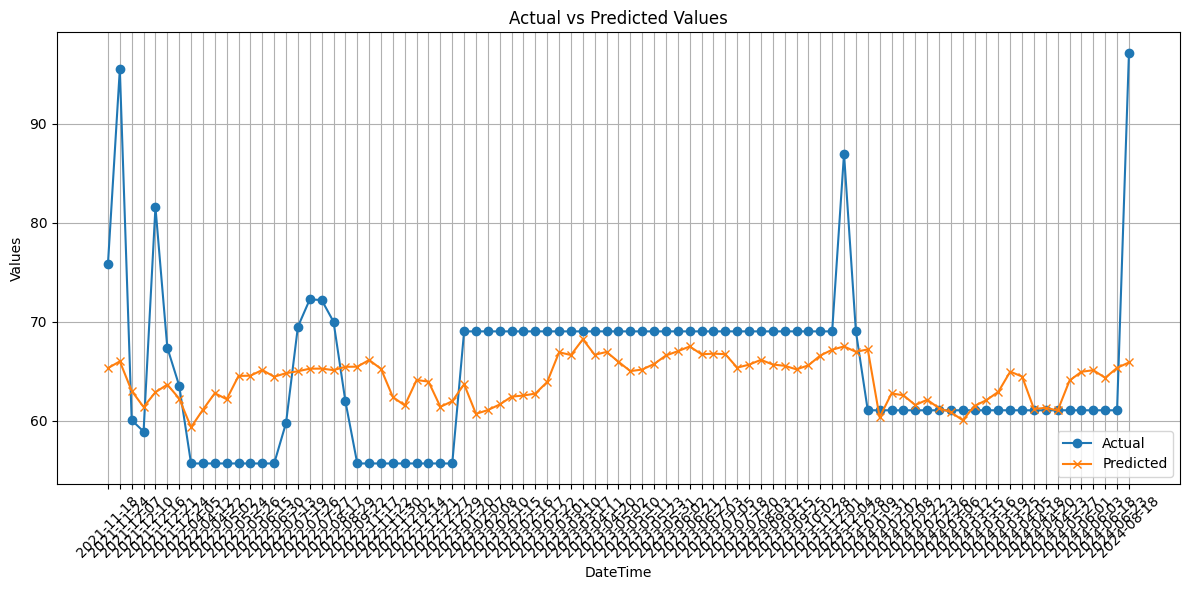

In [16]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Lasso with Alpha 0.8

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create a Lasso regression model
lasso_model = Lasso(alpha=0.8)  # You can adjust the alpha parameter for regularization

# Train the model on the training data
lasso_model.fit(X_train_selected, y_train)

# Make predictions on the validation data
y_pred = lasso_model.predict(X_val_selected)

# Evaluate the model performance

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Optionally, calculate Adjusted R-squared (if needed)
n = len(y_val)  # Number of samples
p = X_val_selected.shape[1]  # Number of features (predictors)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {r2_adj}')

# If needed, you can print the coefficients to see the effect of regularization
print(f'Lasso coefficients: {lasso_model.coef_}')


Mean Squared Error: 61.16585684273183
Root Mean Squared Error: 7.820860364610266
Mean Absolute Error: 6.004561161072649
R-squared: 0.022869973021993895
Explained Variance Score: 0.031548152826595954
Adjusted R-squared: -0.03744669530998168
Lasso coefficients: [-0.         -0.77763264 -0.          0.         -0.        ]


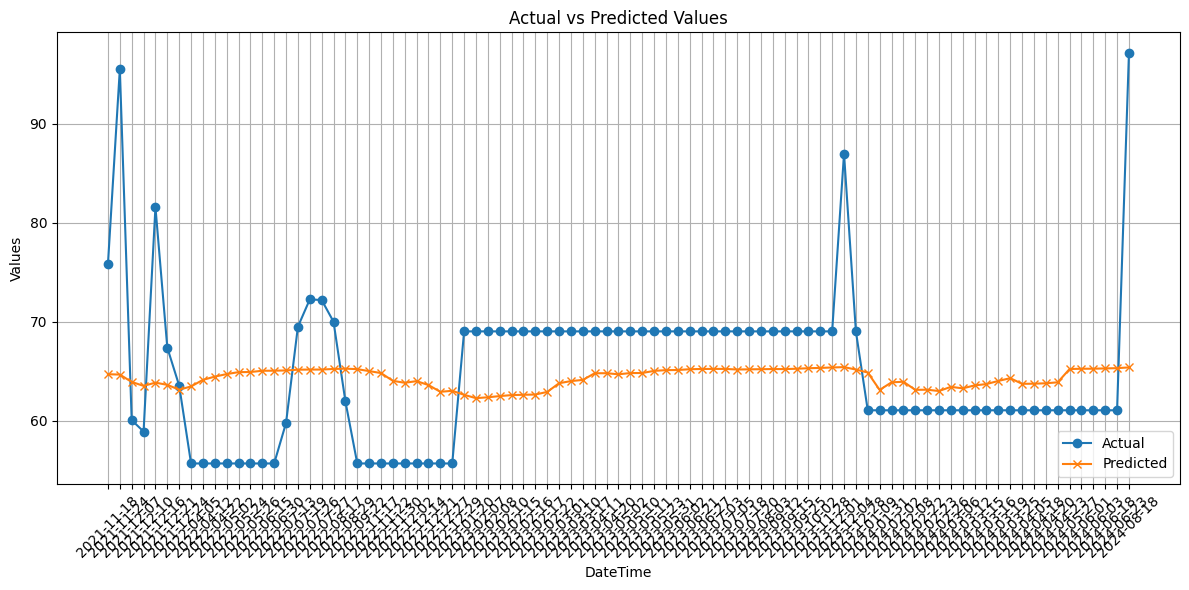

In [18]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Elastic Net

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Create an Elastic Net regression model
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# Train the model on the training data
elastic_net_model.fit(X_train_selected, y_train)

# Make predictions on the validation data
y_pred = elastic_net_model.predict(X_val_selected)

# Evaluate the model performance

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_pred)

# R-squared (R²)
r2 = r2_score(y_val, y_pred)

# Explained Variance Score
explained_variance = explained_variance_score(y_val, y_pred)

# Optionally, calculate Adjusted R-squared (if needed)
n = len(y_val)  # Number of samples
p = X_val_selected.shape[1]  # Number of features (predictors)
r2_adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Explained Variance Score: {explained_variance}')
print(f'Adjusted R-squared: {r2_adj}')

# If needed, you can print the coefficients to see the effect of regularization
print(f'Elastic Net coefficients: {elastic_net_model.coef_}')


Mean Squared Error: 55.11236953982659
Root Mean Squared Error: 7.423770574298925
Mean Absolute Error: 5.321832692844701
R-squared: 0.11957497344089485
Explained Variance Score: 0.13158786048199334
Adjusted R-squared: 0.06522774957922173
Elastic Net coefficients: [-0.98106633 -2.39912522 -0.36251473  1.96885531  0.        ]


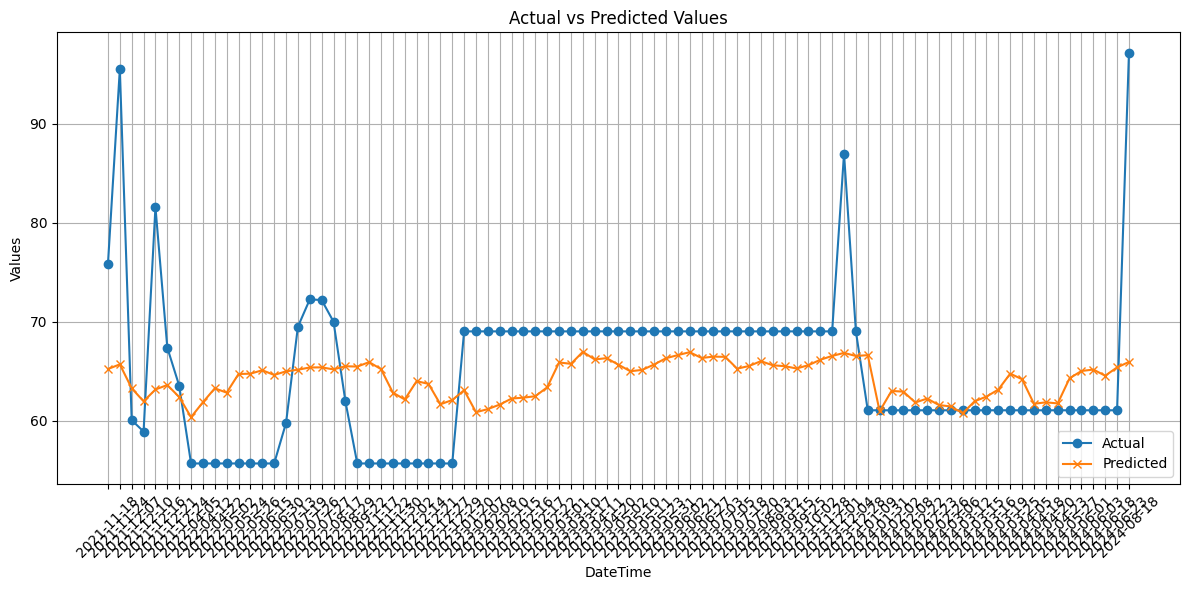

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Gradient Boosted Performed Suprisingly Well

In [33]:
import xgboost as xgb
# Create XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model.fit(X_train_selected, y_train)

# Predictions and evaluation
y_pred = model.predict(X_val_selected)
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 17.186514642198542
Root Mean Squared Error: 4.145662147618706


In [34]:
# Predictions on validation data
y_pred = model.predict(X_val_selected)

In [35]:
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.186514642198542
Root Mean Squared Error: 4.145662147618706
R-squared: 0.7254438933281309


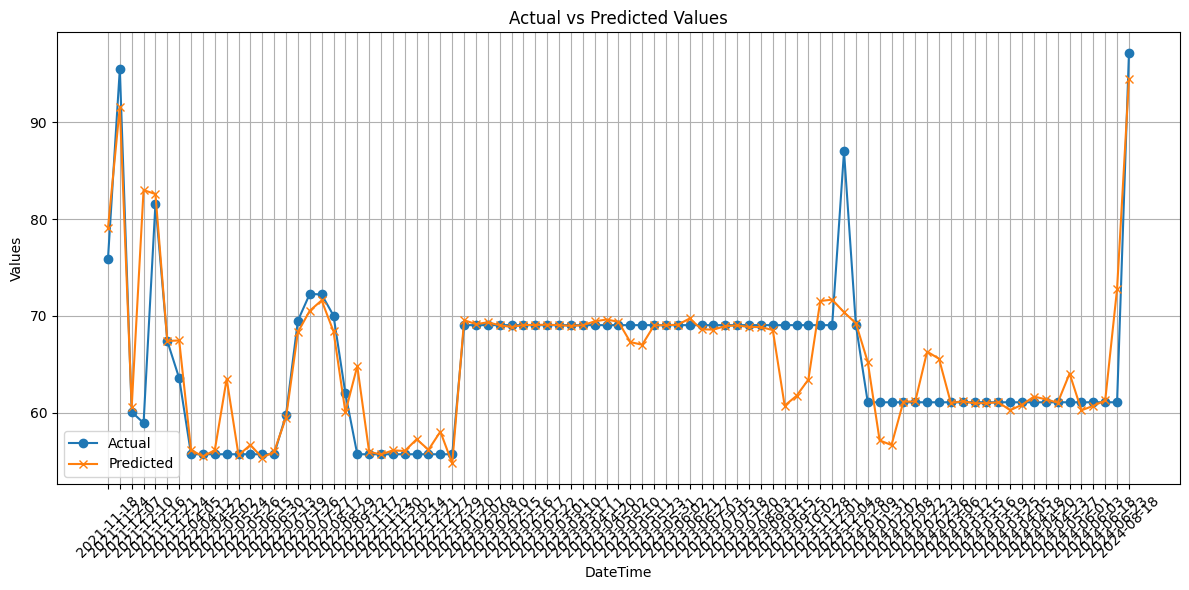

In [36]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected.index, y_val, label='Actual', marker='o')
plt.plot(X_val_selected.index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Predict Week Ahead Prices

In [25]:

# Predictions on validation data
y_pred = model.predict(X_val_selected[:7])
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val[:7], y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.186514642198542
Root Mean Squared Error: 4.145662147618706
R-squared: 0.41684012311678165


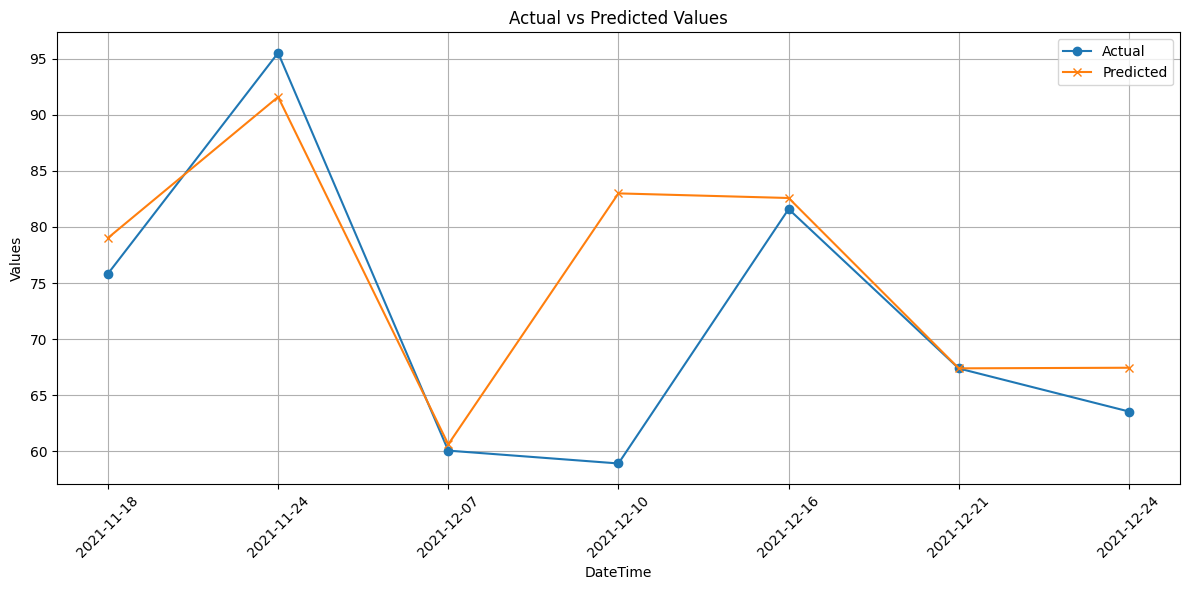

In [27]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected[:7].index, y_val[:7], label='Actual', marker='o')
plt.plot(X_val_selected[:7].index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


Predict 30 Days Ahead

In [28]:

# Predictions on validation data
y_pred = model.predict(X_val_selected[:30])
from sklearn.metrics import r2_score

# R-squared score
r2 = r2_score(y_val[:30], y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Squared Error: 17.186514642198542
Root Mean Squared Error: 4.145662147618706
R-squared: 0.7141681486876952


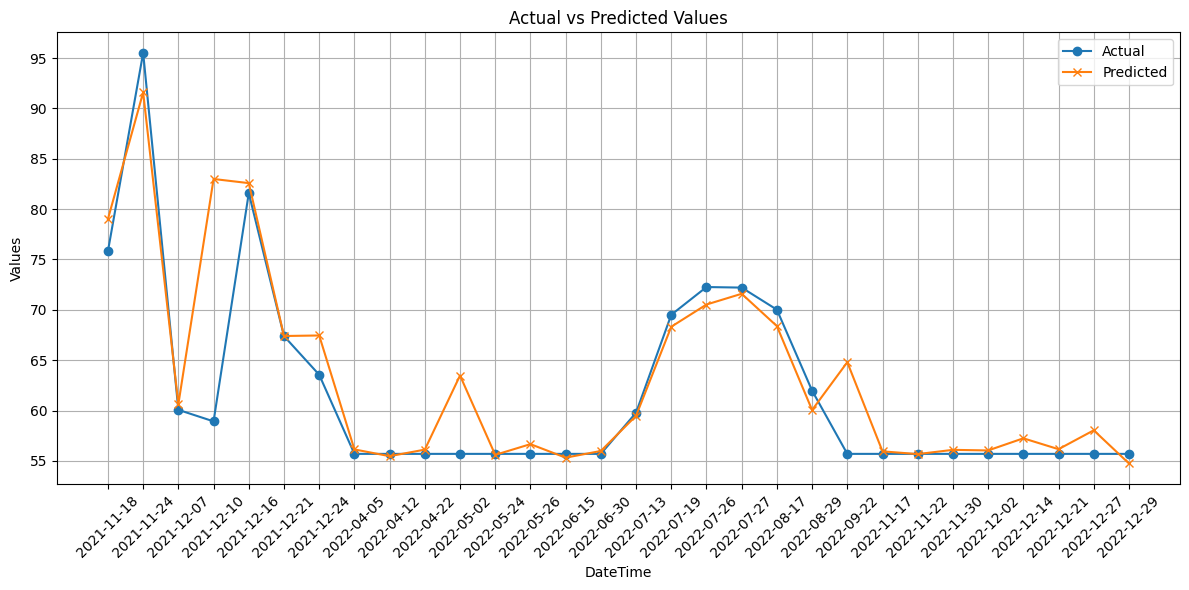

In [30]:

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting y_actual vs y_pred
plt.figure(figsize=(12, 6))
plt.plot(X_val_selected[:30].index, y_val[:30], label='Actual', marker='o')
plt.plot(X_val_selected[:30].index, y_pred, label='Predicted', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('DateTime')
plt.ylabel('Values')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=45)

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()